# Day Trading Notebook
<b>Authors: Jared Prior and Miguel Oyler-Castrillo</b>

In [11]:
import urllib3
from bs4 import BeautifulSoup
import bs4
import requests
import re
import time
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

BUFFER_TIME = 0.5
def extract_source(url):
    agent = {"User-Agent":"Mozilla/5.0"}
    source=requests.get(url, headers=agent).text
    return source

In [12]:
def getData(source):
    soup=bs4.BeautifulSoup(source, 'lxml')
    stocks = soup.findAll('tr')
    ids = []
    names = []
    prices = []
    changes = []
    deltas = []
    for stock in stocks:
        td = stock.findAll('td')
        i = 0
        vals = []
        for d in td:
            txt = d.get_text()
            if txt == " " or txt == "" or txt == '' or txt == 'N/A':
                continue
            else:
                vals.append(txt)
        if vals == []:
            del vals
            continue
        else:
            ids.append(vals[0])
            names.append(vals[1])
            prices.append(vals[2])
            changes.append(vals[3])
            deltas.append(vals[4])
    dct_df = {"Identifier":ids,
              "Name":names,
              "Price":prices,
              "Change":changes,
              "Percent Change":deltas}
    df = pd.DataFrame(dct_df, columns = ["Identifier",
                                         "Name",
                                         "Price",
                                         "Change",
                                         "Percent Change"])
    return df

In [13]:
global STOCK_TREND_DICT
STOCK_TREND_DICT = {}
def exists(name):
    if name in STOCK_TREND_DICT:
        return True
    else:
        return False
def row_parser(row):
    company = row['Identifier']
    price = row['Price']
    if not exists(company):
        STOCK_TREND_DICT[company] = []
    STOCK_TREND_DICT[company].append(float(price))

  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.37   +1.99   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.54   +2.29   
2        UAL       United Airlines Holdings, Inc.   37.85   +4.53   
3         BA                   The Boeing Company  182.26  +12.26   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.83%  
1        +13.28%  
2        +13.60%  
3         +7.21%  
4         +3.96%  


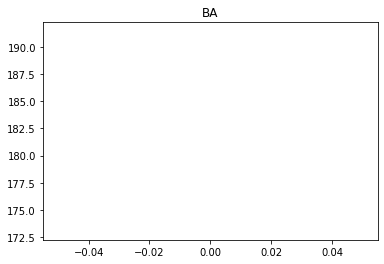

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.34   +1.96   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.53   +2.28   
2        UAL       United Airlines Holdings, Inc.   37.81   +4.49   
3         BA                   The Boeing Company  182.30  +12.30   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.63%  
1        +13.22%  
2        +13.49%  
3         +7.24%  
4         +3.96%  


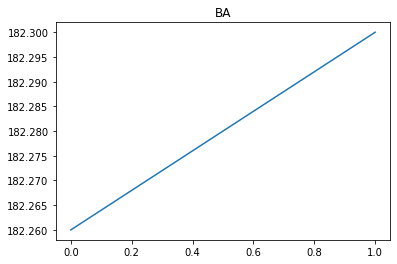

Cash on hand is: 1000.219466695929
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.36   +1.98   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.57   +2.32   
2        UAL       United Airlines Holdings, Inc.   37.88   +4.56   
3         BA                   The Boeing Company  182.32  +12.32   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.80%  
1        +13.45%  
2        +13.69%  
3         +7.25%  
4         +3.96%  


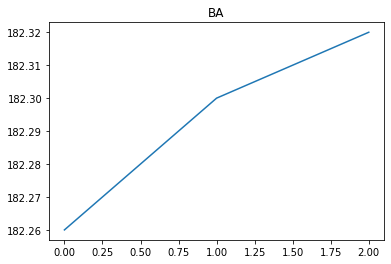

Cash on hand is: 1000.219466695929
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.33   +1.95   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.53   +2.28   
2        UAL       United Airlines Holdings, Inc.   37.81   +4.49   
3         BA                   The Boeing Company  182.29  +12.29   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.56%  
1        +13.25%  
2        +13.48%  
3         +7.23%  
4         +3.96%  


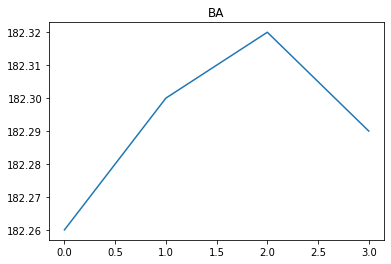

Cash on hand is: 1000.219466695929
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.33   +1.95   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.53   +2.28   
2        UAL       United Airlines Holdings, Inc.   37.84   +4.52   
3         BA                   The Boeing Company  182.37  +12.37   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.56%  
1        +13.25%  
2        +13.56%  
3         +7.28%  
4         +3.96%  


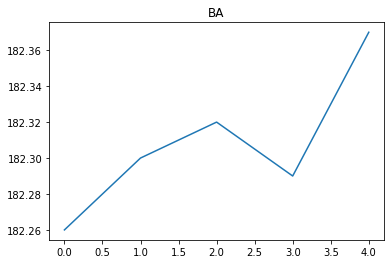

Cash on hand is: 1000.219466695929
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.33   +1.95   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.54   +2.29   
2        UAL       United Airlines Holdings, Inc.   37.84   +4.52   
3         BA                   The Boeing Company  182.34  +12.34   
4         GE             General Electric Company    7.22   +0.27   

  Percent Change  
0        +13.60%  
1        +13.27%  
2        +13.57%  
3         +7.26%  
4         +3.88%  


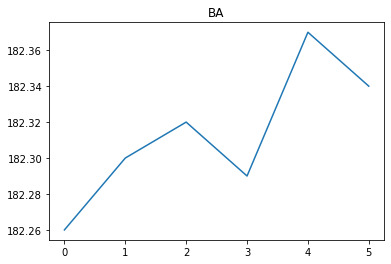

Cash on hand is: 1000.219466695929
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.33   +1.95   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.54   +2.29   
2        UAL       United Airlines Holdings, Inc.   37.84   +4.52   
3         BA                   The Boeing Company  182.24  +12.24   
4         GE             General Electric Company    7.22   +0.27   

  Percent Change  
0        +13.56%  
1        +13.28%  
2        +13.57%  
3         +7.20%  
4         +3.88%  


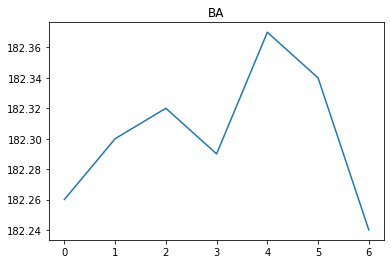

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.34   +1.96   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.54   +2.29   
2        UAL       United Airlines Holdings, Inc.   37.82   +4.50   
3         BA                   The Boeing Company  182.30  +12.30   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.63%  
1        +13.27%  
2        +13.50%  
3         +7.24%  
4         +3.96%  


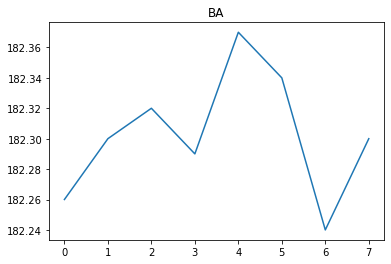

Cash on hand is: 1000.5487751243845
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.37   +1.99   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.55   +2.30   
2        UAL       United Airlines Holdings, Inc.   37.87   +4.55   
3         BA                   The Boeing Company  182.48  +12.48   
4         GE             General Electric Company    7.22   +0.27   

  Percent Change  
0        +13.83%  
1        +13.33%  
2        +13.66%  
3         +7.34%  
4         +3.81%  


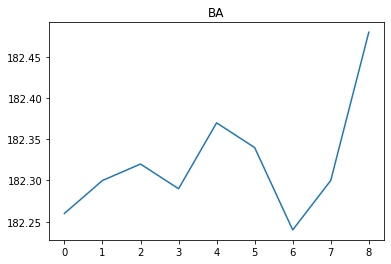

Cash on hand is: 1000.5487751243845
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.37   +1.99   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.58   +2.33   
2        UAL       United Airlines Holdings, Inc.   37.89   +4.57   
3         BA                   The Boeing Company  182.51  +12.51   
4         GE             General Electric Company    7.22   +0.27   

  Percent Change  
0        +13.84%  
1        +13.51%  
2        +13.72%  
3         +7.36%  
4         +3.92%  


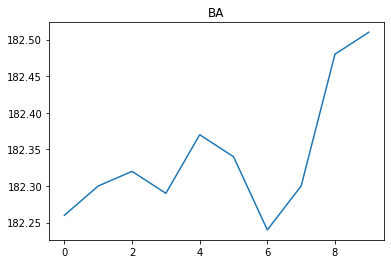

Cash on hand is: 1000.5487751243845
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.35   +1.97   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.56   +2.31   
2        UAL       United Airlines Holdings, Inc.   37.90   +4.58   
3         BA                   The Boeing Company  182.39  +12.39   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.70%  
1        +13.39%  
2        +13.76%  
3         +7.29%  
4         +3.96%  


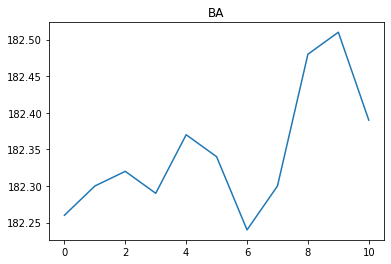

Cash on hand is: 1000.5487751243845
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.33   +1.95   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.53   +2.28   
2        UAL       United Airlines Holdings, Inc.   37.81   +4.49   
3         BA                   The Boeing Company  182.29  +12.29   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.56%  
1        +13.25%  
2        +13.48%  
3         +7.23%  
4         +3.96%  


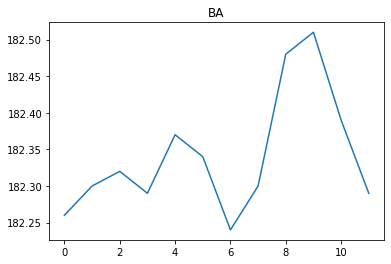

Cash on hand is: 1000.5487751243845
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.33   +1.95   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.54   +2.29   
2        UAL       United Airlines Holdings, Inc.   37.84   +4.52   
3         BA                   The Boeing Company  182.24  +12.24   
4         GE             General Electric Company    7.22   +0.27   

  Percent Change  
0        +13.56%  
1        +13.28%  
2        +13.57%  
3         +7.20%  
4         +3.88%  


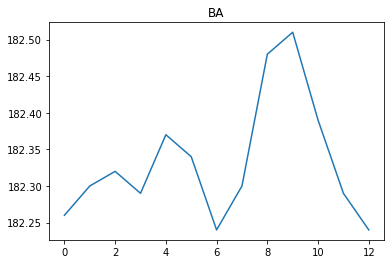

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.35   +1.97   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.57   +2.32   
2        UAL       United Airlines Holdings, Inc.   37.88   +4.56   
3         BA                   The Boeing Company  182.40  +12.40   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.73%  
1        +13.45%  
2        +13.69%  
3         +7.29%  
4         +3.96%  


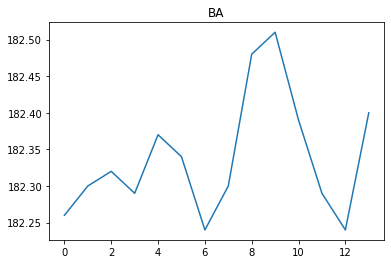

Cash on hand is: 1001.4272200542566
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.38   +2.00   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.57   +2.32   
2        UAL       United Airlines Holdings, Inc.   37.89   +4.57   
3         BA                   The Boeing Company  182.43  +12.43   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.91%  
1        +13.45%  
2        +13.72%  
3         +7.31%  
4         +3.96%  


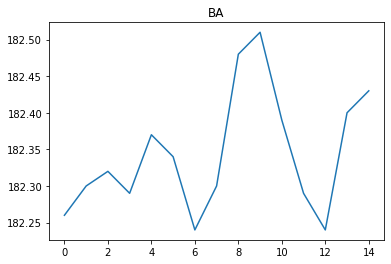

Cash on hand is: 1001.4272200542566
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.37   +1.99   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.56   +2.31   
2        UAL       United Airlines Holdings, Inc.   37.89   +4.57   
3         BA                   The Boeing Company  182.91  +12.91   
4         GE             General Electric Company    7.23   +0.28   

  Percent Change  
0        +13.84%  
1        +13.39%  
2        +13.72%  
3         +7.59%  
4         +4.00%  


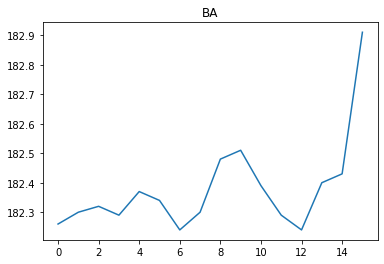

Cash on hand is: 1001.4272200542566
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.33   +1.95   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.53   +2.28   
2        UAL       United Airlines Holdings, Inc.   37.84   +4.52   
3         BA                   The Boeing Company  182.37  +12.37   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.56%  
1        +13.25%  
2        +13.56%  
3         +7.28%  
4         +3.96%  


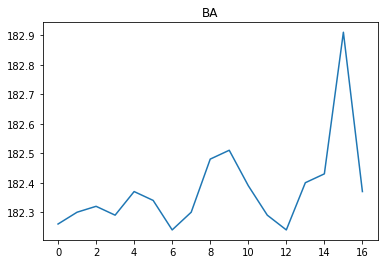

Cash on hand is: 1001.4272200542566
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.38   +1.99   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.58   +2.33   
2        UAL       United Airlines Holdings, Inc.   37.92   +4.60   
3         BA                   The Boeing Company  182.71  +12.71   
4         GE             General Electric Company    7.23   +0.28   

  Percent Change  
0        +13.87%  
1        +13.51%  
2        +13.81%  
3         +7.48%  
4         +4.03%  


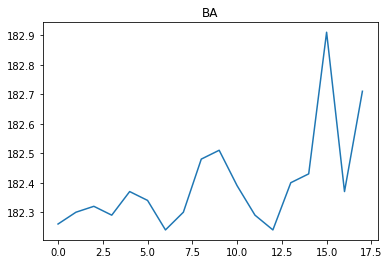

Cash on hand is: 1001.4272200542566
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.37   +1.99   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.56   +2.31   
2        UAL       United Airlines Holdings, Inc.   37.89   +4.57   
3         BA                   The Boeing Company  182.91  +12.91   
4         GE             General Electric Company    7.23   +0.28   

  Percent Change  
0        +13.84%  
1        +13.39%  
2        +13.72%  
3         +7.59%  
4         +4.00%  


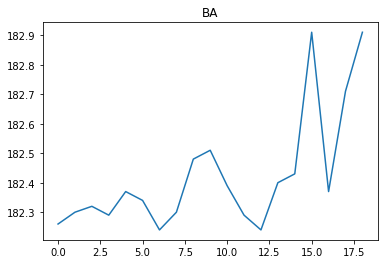

Cash on hand is: 1001.4272200542566
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.33   +1.95   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.54   +2.29   
2        UAL       United Airlines Holdings, Inc.   37.84   +4.52   
3         BA                   The Boeing Company  182.24  +12.24   
4         GE             General Electric Company    7.22   +0.27   

  Percent Change  
0        +13.56%  
1        +13.28%  
2        +13.57%  
3         +7.20%  
4         +3.88%  


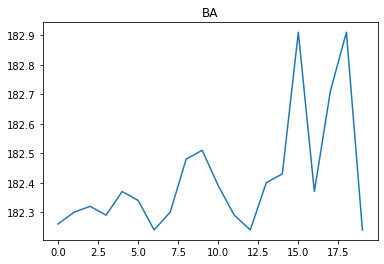

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.36   +1.98   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.58   +2.33   
2        UAL       United Airlines Holdings, Inc.   37.91   +4.59   
3         BA                   The Boeing Company  182.83  +12.83   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.80%  
1        +13.51%  
2        +13.78%  
3         +7.55%  
4         +3.96%  


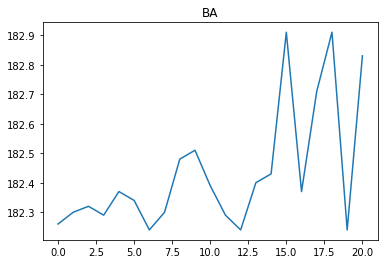

Cash on hand is: 1004.6693296889802
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.36   +1.98   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.57   +2.32   
2        UAL       United Airlines Holdings, Inc.   37.88   +4.56   
3         BA                   The Boeing Company  182.32  +12.32   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.80%  
1        +13.45%  
2        +13.69%  
3         +7.25%  
4         +3.96%  


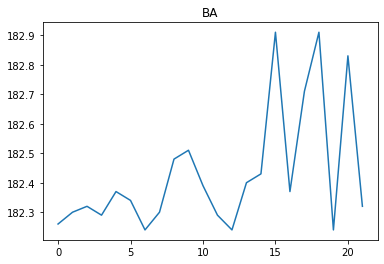

Cash on hand is: 1004.6693296889802
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.39   +2.01   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.59   +2.34   
2        UAL       United Airlines Holdings, Inc.   37.92   +4.60   
3         BA                   The Boeing Company  182.67  +12.67   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.98%  
1        +13.58%  
2        +13.79%  
3         +7.45%  
4         +3.96%  


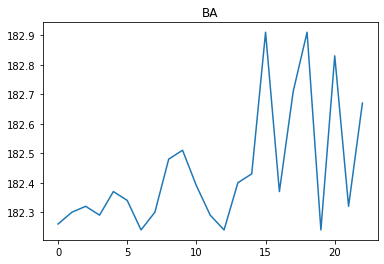

Cash on hand is: 1004.6693296889802
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.38   +1.99   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.57   +2.32   
2        UAL       United Airlines Holdings, Inc.   37.91   +4.59   
3         BA                   The Boeing Company  182.62  +12.62   
4         GE             General Electric Company    7.22   +0.27   

  Percent Change  
0        +13.87%  
1        +13.45%  
2        +13.78%  
3         +7.42%  
4         +3.95%  


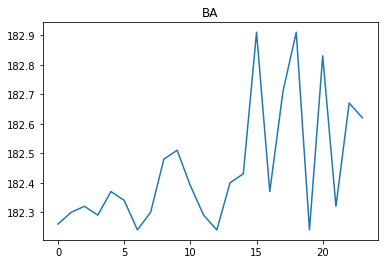

Cash on hand is: 1004.6693296889802
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.35   +1.97   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.55   +2.30   
2        UAL       United Airlines Holdings, Inc.   37.86   +4.54   
3         BA                   The Boeing Company  182.49  +12.49   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.73%  
1        +13.33%  
2        +13.63%  
3         +7.34%  
4         +3.96%  


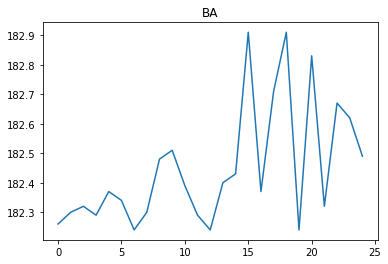

Cash on hand is: 1004.6693296889802
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.35   +1.97   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.58   +2.33   
2        UAL       United Airlines Holdings, Inc.   37.89   +4.57   
3         BA                   The Boeing Company  182.39  +12.39   
4         GE             General Electric Company    7.23   +0.28   

  Percent Change  
0        +13.73%  
1        +13.51%  
2        +13.72%  
3         +7.29%  
4         +4.03%  


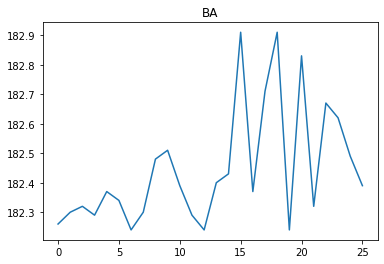

Cash on hand is: 1004.6693296889802
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.35   +1.97   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.55   +2.30   
2        UAL       United Airlines Holdings, Inc.   37.86   +4.54   
3         BA                   The Boeing Company  182.49  +12.49   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.73%  
1        +13.33%  
2        +13.63%  
3         +7.34%  
4         +3.96%  


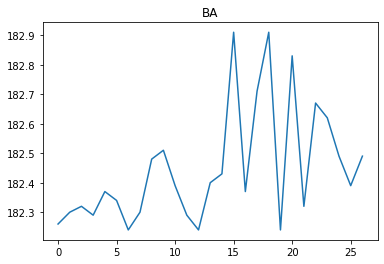

Cash on hand is: 1004.6693296889802
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.35   +1.97   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.56   +2.31   
2        UAL       United Airlines Holdings, Inc.   37.84   +4.52   
3         BA                   The Boeing Company  182.71  +12.71   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.73%  
1        +13.39%  
2        +13.57%  
3         +7.48%  
4         +3.96%  


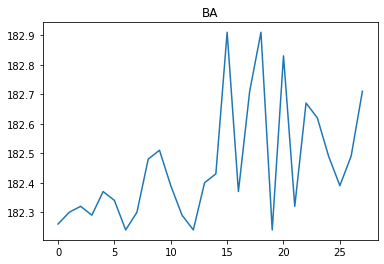

Cash on hand is: 1004.6693296889802
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.36   +1.98   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.55   +2.30   
2        UAL       United Airlines Holdings, Inc.   37.84   +4.52   
3         BA                   The Boeing Company  182.59  +12.59   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.76%  
1        +13.34%  
2        +13.57%  
3         +7.41%  
4         +3.96%  


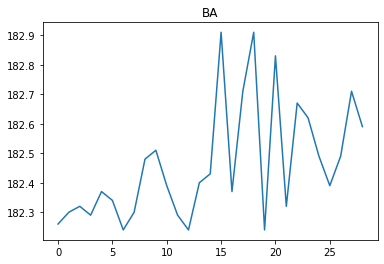

Cash on hand is: 1004.6693296889802
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.35   +1.97   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.55   +2.30   
2        UAL       United Airlines Holdings, Inc.   37.84   +4.52   
3         BA                   The Boeing Company  182.50  +12.50   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.70%  
1        +13.35%  
2        +13.57%  
3         +7.35%  
4         +3.96%  


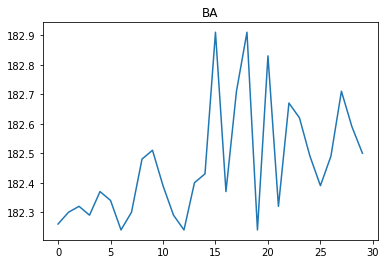

Cash on hand is: 1004.6693296889802
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.35   +1.97   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.55   +2.30   
2        UAL       United Airlines Holdings, Inc.   37.83   +4.51   
3         BA                   The Boeing Company  182.50  +12.50   
4         GE             General Electric Company    7.23   +0.28   

  Percent Change  
0        +13.69%  
1        +13.33%  
2        +13.54%  
3         +7.35%  
4         +4.03%  


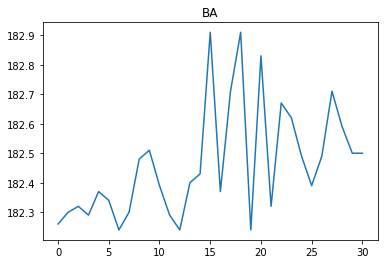

Cash on hand is: 1004.6693296889802
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.34   +1.96   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.56   +2.31   
2        UAL       United Airlines Holdings, Inc.   37.82   +4.50   
3         BA                   The Boeing Company  182.31  +12.31   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.63%  
1        +13.36%  
2        +13.51%  
3         +7.24%  
4         +3.96%  


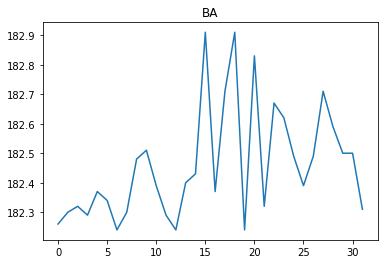

Cash on hand is: 1004.6693296889802
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.33   +1.95   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.56   +2.31   
2        UAL       United Airlines Holdings, Inc.   37.82   +4.50   
3         BA                   The Boeing Company  182.20  +12.20   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.56%  
1        +13.36%  
2        +13.51%  
3         +7.18%  
4         +3.96%  


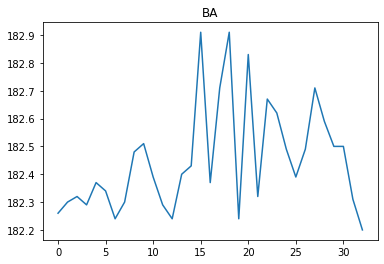

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.33   +1.95   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.53   +2.28   
2        UAL       United Airlines Holdings, Inc.   37.82   +4.50   
3         BA                   The Boeing Company  182.30  +12.30   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.56%  
1        +13.21%  
2        +13.51%  
3         +7.24%  
4         +3.96%  


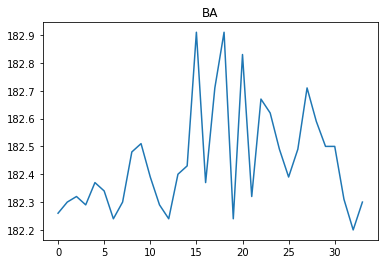

Cash on hand is: 1005.2207398589522
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.39   +2.01   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.59   +2.34   
2        UAL       United Airlines Holdings, Inc.   37.93   +4.61   
3         BA                   The Boeing Company  182.80  +12.80   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.94%  
1        +13.57%  
2        +13.84%  
3         +7.53%  
4         +3.96%  


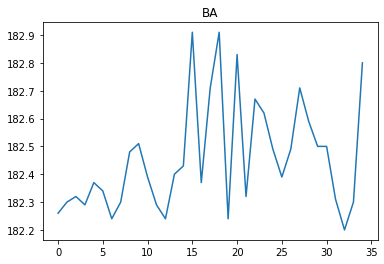

Cash on hand is: 1005.2207398589522
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.37   +1.99   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.57   +2.32   
2        UAL       United Airlines Holdings, Inc.   37.92   +4.60   
3         BA                   The Boeing Company  182.78  +12.78   
4         GE             General Electric Company    7.23   +0.28   

  Percent Change  
0        +13.84%  
1        +13.46%  
2        +13.81%  
3         +7.52%  
4         +4.03%  


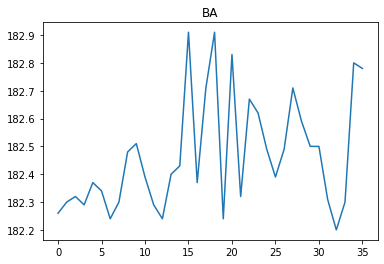

Cash on hand is: 1005.2207398589522
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.33   +1.95   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.52   +2.27   
2        UAL       United Airlines Holdings, Inc.   37.83   +4.51   
3         BA                   The Boeing Company  182.29  +12.29   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.56%  
1        +13.19%  
2        +13.52%  
3         +7.23%  
4         +3.96%  


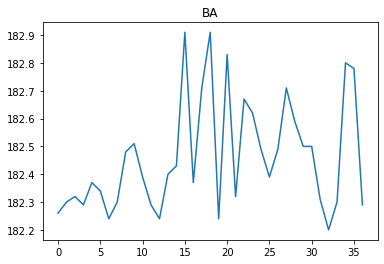

Cash on hand is: 1005.2207398589522
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.33   +1.95   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.52   +2.27   
2        UAL       United Airlines Holdings, Inc.   37.82   +4.50   
3         BA                   The Boeing Company  182.30  +12.30   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.53%  
1        +13.18%  
2        +13.51%  
3         +7.24%  
4         +3.96%  


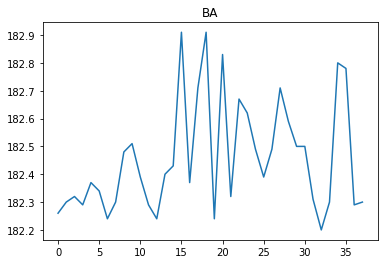

Cash on hand is: 1005.2207398589522
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.38   +1.99   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.57   +2.32   
2        UAL       United Airlines Holdings, Inc.   37.91   +4.59   
3         BA                   The Boeing Company  182.62  +12.62   
4         GE             General Electric Company    7.22   +0.27   

  Percent Change  
0        +13.87%  
1        +13.45%  
2        +13.78%  
3         +7.42%  
4         +3.95%  


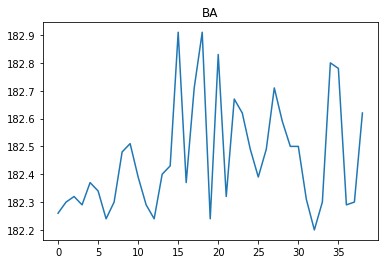

Cash on hand is: 1005.2207398589522
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.32   +1.94   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.52   +2.27   
2        UAL       United Airlines Holdings, Inc.   37.81   +4.49   
3         BA                   The Boeing Company  182.29  +12.29   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.49%  
1        +13.16%  
2        +13.46%  
3         +7.23%  
4         +3.96%  


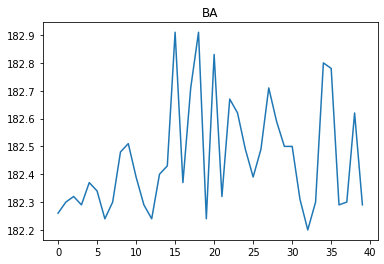

Cash on hand is: 1005.2207398589522
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.35   +1.97   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.55   +2.30   
2        UAL       United Airlines Holdings, Inc.   37.83   +4.51   
3         BA                   The Boeing Company  182.50  +12.50   
4         GE             General Electric Company    7.23   +0.28   

  Percent Change  
0        +13.69%  
1        +13.33%  
2        +13.54%  
3         +7.35%  
4         +4.03%  


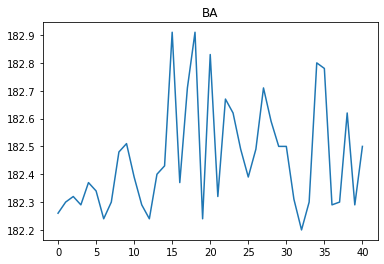

Cash on hand is: 1005.2207398589522
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.39   +2.01   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.59   +2.34   
2        UAL       United Airlines Holdings, Inc.   37.93   +4.61   
3         BA                   The Boeing Company  182.80  +12.80   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.94%  
1        +13.57%  
2        +13.84%  
3         +7.53%  
4         +3.96%  


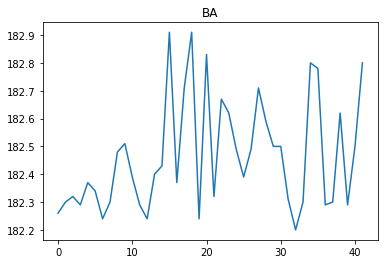

Cash on hand is: 1005.2207398589522
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.35   +1.97   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.56   +2.31   
2        UAL       United Airlines Holdings, Inc.   37.84   +4.52   
3         BA                   The Boeing Company  182.67  +12.67   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.70%  
1        +13.39%  
2        +13.57%  
3         +7.45%  
4         +3.96%  


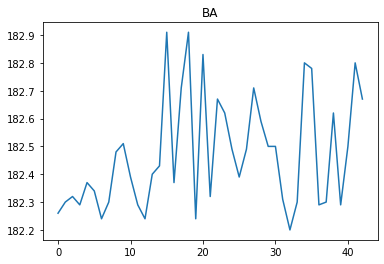

Cash on hand is: 1005.2207398589522
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.35   +1.97   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.55   +2.30   
2        UAL       United Airlines Holdings, Inc.   37.83   +4.51   
3         BA                   The Boeing Company  182.50  +12.50   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.73%  
1        +13.34%  
2        +13.54%  
3         +7.35%  
4         +3.96%  


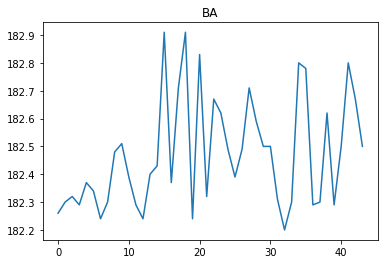

Cash on hand is: 1005.2207398589522
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.32   +1.94   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.52   +2.27   
2        UAL       United Airlines Holdings, Inc.   37.83   +4.51   
3         BA                   The Boeing Company  182.23  +12.23   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.49%  
1        +13.19%  
2        +13.54%  
3         +7.19%  
4         +3.96%  


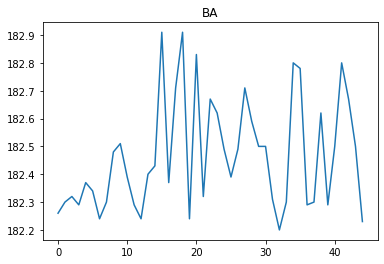

Cash on hand is: 1005.2207398589522
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.30   +1.92   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.50   +2.25   
2        UAL       United Airlines Holdings, Inc.   37.74   +4.42   
3         BA                   The Boeing Company  182.12  +12.12   
4         GE             General Electric Company    7.21   +0.26   

  Percent Change  
0        +13.36%  
1        +13.04%  
2        +13.25%  
3         +7.13%  
4         +3.74%  


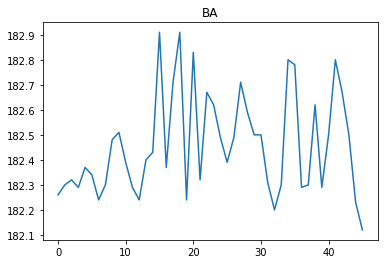

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.35   +1.97   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.55   +2.30   
2        UAL       United Airlines Holdings, Inc.   37.83   +4.51   
3         BA                   The Boeing Company  182.41  +12.41   
4         GE             General Electric Company    7.22   +0.28   

  Percent Change  
0        +13.69%  
1        +13.33%  
2        +13.54%  
3         +7.30%  
4         +3.96%  


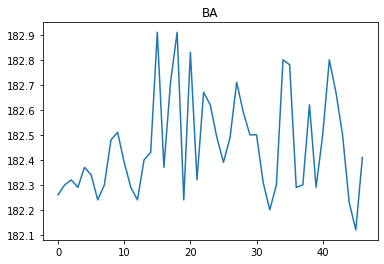

Cash on hand is: 1006.8214098268804
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.31   +1.93   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.46   +2.21   
2        UAL       United Airlines Holdings, Inc.   37.73   +4.41   
3         BA                   The Boeing Company  182.24  +12.24   
4         GE             General Electric Company    7.20   +0.26   

  Percent Change  
0        +13.39%  
1        +12.81%  
2        +13.23%  
3         +7.20%  
4         +3.67%  


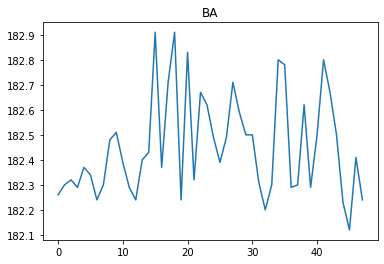

Cash on hand is: 1006.8214098268804
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.30   +1.92   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.47   +2.22   
2        UAL       United Airlines Holdings, Inc.   37.72   +4.40   
3         BA                   The Boeing Company  182.28  +12.28   
4         GE             General Electric Company    7.20   +0.26   

  Percent Change  
0        +13.35%  
1        +12.84%  
2        +13.21%  
3         +7.22%  
4         +3.67%  


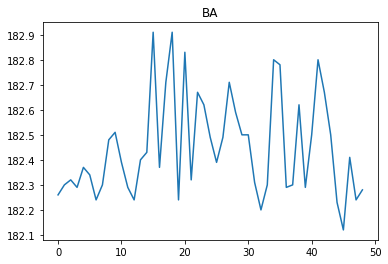

Cash on hand is: 1006.8214098268804
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.31   +1.93   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.46   +2.21   
2        UAL       United Airlines Holdings, Inc.   37.73   +4.41   
3         BA                   The Boeing Company  182.35  +12.35   
4         GE             General Electric Company    7.20   +0.26   

  Percent Change  
0        +13.42%  
1        +12.83%  
2        +13.23%  
3         +7.26%  
4         +3.67%  


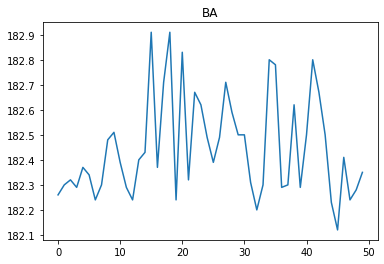

Cash on hand is: 1006.8214098268804
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.31   +1.93   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.47   +2.22   
2        UAL       United Airlines Holdings, Inc.   37.72   +4.40   
3         BA                   The Boeing Company  182.12  +12.12   
4         GE             General Electric Company    7.20   +0.26   

  Percent Change  
0        +13.39%  
1        +12.87%  
2        +13.21%  
3         +7.13%  
4         +3.67%  


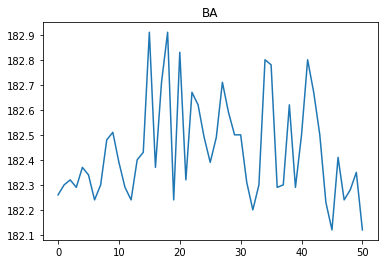

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.27   +1.89   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.46   +2.21   
2        UAL       United Airlines Holdings, Inc.   37.70   +4.38   
3         BA                   The Boeing Company  182.06  +12.06   
4         GE             General Electric Company    7.20   +0.26   

  Percent Change  
0        +13.14%  
1        +12.81%  
2        +13.15%  
3         +7.09%  
4         +3.67%  


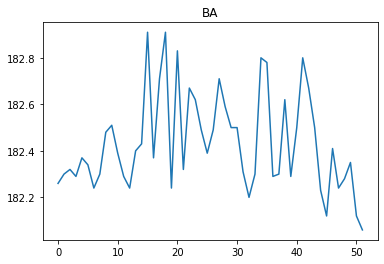

Cash on hand is: 0


In [ ]:
dfs = []
STOCK_TREND_DICT = {}
URL_stem = 'https://finance.yahoo.com/most-active?count=100&offset='
money_amount = 1000
PURCHASED_STOCKS = {}
def construct_slope(pl, window):
    for i in range(5):
        current = pl[-i]
        previous = pl[-(i+1)]
        diff = float(current) - float(previous)
        print(diff)
def check_purchase(ID):
    return ID in PURCHASED_STOCKS
while 1:
    # retrive current moment's data
    offset = 0
    count = 0
    og_df = getData(extract_source(URL_stem + str(offset)))
    while count <1:
        offset+=100
        count+=1
        #create dataframe and add it to log of dataframes
        og_df = pd.concat([og_df,
                           getData(extract_source\
                                   (URL_stem + str(offset)))])
    dfs.append(og_df)
    print(og_df.head())
    og_df.apply(row_parser,axis=1)
    for ID in STOCK_TREND_DICT:
        if ID == 'BA':
            fig, ax = plt.subplots()
            ax.plot(STOCK_TREND_DICT[ID])
            ax.set_title(ID)
            plt.show()

            #analysis
            price_list = STOCK_TREND_DICT[ID]
            #if len(price_list) > 5:
                #construct_slope(price_list, 5)
            if check_purchase(ID):
                if price_list[-1] > PURCHASED_STOCKS[ID][1] and PURCHASED_STOCKS[ID][0] != 0:
                    #sell
                    money_amount += PURCHASED_STOCKS[ID][0] * price_list[-1]
                    PURCHASED_STOCKS[ID] = (0, 0)
                else:
                    if price_list[-1] == min(price_list):
                        #buy
                        shares = money_amount/price_list[-1]
                        money_amount = 0
                        PURCHASED_STOCKS[ID]=(shares,price_list[-1])
            else:
                if price_list[-1] == min(price_list):
                    #buy
                    shares = money_amount/price_list[-1]
                    money_amount = 0
                    PURCHASED_STOCKS[ID] = (shares, price_list[-1])
    print("Cash on hand is: " + str(money_amount))
    time.sleep(BUFFER_TIME)